# CAP 6619 - Deep Learning
## Summer 2021 - Dr Marques
## Assignment 1 Asam Mahmood
## Handwritten Digit Classifier Using the MNIST Dataset

Useful references and sources:

- https://www.tensorflow.org/datasets/catalog/mnist

- https://en.wikipedia.org/wiki/MNIST_database 

- https://keras.io/examples/vision/mnist_convnet/

- https://github.com/the-deep-learners/deep-learning-illustrated/blob/master/notebooks/shallow_net_in_keras.ipynb 

### (OPTIONAL) TODO 1

Add your own sources and references here.

Below you can see some libs i had to pull in to help build and run code aand help time performance on execution

absl-py==0.13.0
appdirs==1.4.4
argon2-cffi==20.1.0
as==0.1
astunparse==1.6.3
async-generator==1.10
attrs==21.2.0
backcall==0.2.0
bleach==3.3.0
blis==0.7.4
cachetools==4.2.2
catalogue==2.0.4
certifi==2021.5.30
cffi==1.14.5
chardet==4.0.0
click==7.1.2
colorama==0.4.4
cycler==0.10.0
cymem==2.0.5
decorator==5.0.9
defusedxml==0.7.1
entrypoints==0.3
et-xmlfile==1.1.0
flatbuffers==1.12
gast==0.4.0
google-auth==1.32.0
google-auth-oauthlib==0.4.4
google-pasta==0.2.0
grpcio==1.34.1
h5py==3.1.0
idna==2.10
ipykernel==5.5.5
ipython==7.23.1
ipython-genutils==0.2.0
ipywidgets==7.6.3
jedi==0.18.0
Jinja2==3.0.1
joblib==1.0.1
jsonschema==3.2.0
jupyter==1.0.0
jupyter-client==6.1.12
jupyter-console==6.4.0
jupyter-core==4.7.1
jupyterlab-pygments==0.1.2
jupyterlab-widgets==1.0.0
keras-nightly==2.5.0.dev2021032900
Keras-Preprocessing==1.1.2
keras-visualizer==2.4
kiwisolver==1.3.1
Markdown==3.3.4
MarkupSafe==2.0.1
matplotlib==3.4.2
matplotlib-inline==0.1.2
mistune==0.8.4
murmurhash==1.0.5
nbclient==0.5.3
nbconvert==6.0.7
nbformat==5.1.3
nest-asyncio==1.5.1
nltk==3.6.2
notebook==6.4.0
notebook-as-pdf==0.5.0
numpy==1.19.5
oauthlib==3.1.1
openpyxl==3.0.7
opt-einsum==3.3.0
packaging==20.9
pandas==1.2.4
pandoc==1.0.2
pandocfilters==1.4.3
parso==0.8.2
pathy==0.5.2
pickleshare==0.7.5
Pillow==8.2.0
ply==3.11
preshed==3.0.5
prometheus-client==0.10.1
prompt-toolkit==3.0.18
protobuf==3.17.3
pyasn1==0.4.8
pyasn1-modules==0.2.8
pycparser==2.20
pydantic==1.7.4
pyee==8.1.0
Pygments==2.9.0
pyparsing==2.4.7
PyPDF2==1.26.0
pyppeteer==0.2.5
pyrsistent==0.17.3
python-dateutil==2.8.1
pytz==2021.1
pywin32==300
pywinpty==1.1.1
pyzmq==22.0.3
qtconsole==5.1.0
QtPy==1.9.0
regex==2021.4.4
requests==2.25.1
requests-oauthlib==1.3.0
rsa==4.7.2
scikit-learn==0.24.2
scipy==1.6.3
seaborn==0.11.1
Send2Trash==1.5.0
six==1.15.0
smart-open==3.0.0
sns==0.1
spacy==3.0.6
spacy-legacy==3.0.6
srsly==2.4.1
tensorboard==2.5.0
tensorboard-data-server==0.6.1
tensorboard-plugin-wit==1.8.0
tensorflow==2.5.0
tensorflow-estimator==2.5.0
termcolor==1.1.0
terminado==0.10.0
testpath==0.5.0
thinc==8.0.6
threadpoolctl==2.1.0
tornado==6.1
tqdm==4.61.1
traitlets==5.0.5
typer==0.3.2
typing-extensions==3.7.4.3
urllib3==1.26.5
visualizer==0.0.10
wasabi==0.8.2
wcwidth==0.2.5
webencodings==0.5.1
websockets==8.1
Werkzeug==2.0.1
widgetsnbextension==3.5.1
wordcloud==1.8.1
wrapt==1.12.1
xlrd==2.0.1



## Setup

In [88]:
from tensorflow import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
import  keras.metrics
from tensorflow.keras.optimizers import RMSprop
import tensorflow
from keras_visualizer import visualizer
from keras.utils import np_utils
from tensorflow.keras import layers

from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

## Load and prepare the data

In [75]:
# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

# the data, split between train and validation sets
(X_train, y_train), (X_valid, y_valid) = mnist.load_data()

In [76]:
X_train.shape

(60000, 28, 28)

In [77]:
y_train.shape

(60000,)

In [78]:
y_train[0:12]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5], dtype=uint8)

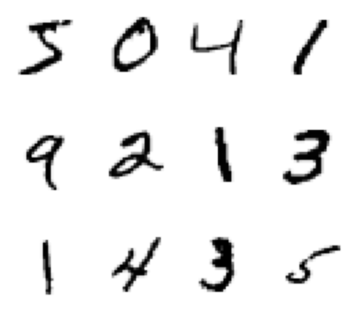

In [79]:
plt.figure(figsize=(5,5))
for k in range(12):
    plt.subplot(3, 4, k+1)
    plt.imshow(X_train[k], cmap='Greys')
    plt.axis('off')
plt.tight_layout()
plt.show()

In [80]:
X_valid.shape

(10000, 28, 28)

In [81]:
y_valid.shape

(10000,)

In [82]:
y_valid[0]

7

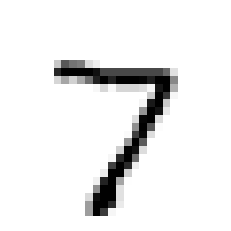

In [83]:
plt.imshow(X_valid[0], cmap='Greys')
plt.axis('off')
plt.show()

In [84]:
# Reshape (flatten) images 
X_train_reshaped = X_train.reshape(60000, 784).astype('float32')
X_valid_reshaped = X_valid.reshape(10000, 784).astype('float32')

# Scale images to the [0, 1] range
X_train_scaled_reshaped = X_train_reshaped / 255
X_valid_scaled_reshaped = X_valid_reshaped / 255

# Renaming for conciseness
X_training = X_train_scaled_reshaped
X_validation = X_valid_scaled_reshaped

print("X_training shape (after reshaping + scaling):", X_training.shape)
print(X_training.shape[0], "train samples")
print("X_validation shape (after reshaping + scaling):", X_validation.shape)
print(X_validation.shape[0], "validation samples")

X_training shape (after reshaping + scaling): (60000, 784)
60000 train samples
X_validation shape (after reshaping + scaling): (10000, 784)
10000 validation samples


In [90]:
# convert class vectors to binary class matrices
y_training = keras.utils.np_utils.to_categorical(y_train, num_classes)
y_validation = keras.utils.np_utils.to_categorical(y_valid, num_classes)

In [91]:
print(y_valid[0])
print(y_validation[0])

7
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


### Question 1

## X_training and Y_training  variables represents the data that will be used as the training data for our model. This is the data from which the algorithm will learn from for all weights in our  network.It will also help to predict the output you architect your model to determine. 

## X_validation and Y_validation these variables represent/hold the unseen data. Data that will be given to the model to report performance metrics. It's also considered test data sets helps validate model. This will also help determine overfitting underfitting and validation. 

## PART 1 - Shallow neural network architecture

In [92]:
model = Sequential()
model.add(Dense(64, activation='sigmoid', input_shape=(784,)))
model.add(Dense(10, activation='softmax'))

In [93]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 64)                50240     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                650       
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________


#### Question 2 

2A The Summary() Method shows the structure of the neural network. the nueral network we defined above. In the settings above you can see we feed the in the input layer with 784 nodes.The inputes represent a single pixel fomr the images. It also shows us param information.The parameter count is the amount of parameters that can be manipulated in the model. This also means the total  dimensions of the optimization problem.

2B the NN has a single hidden layer which is why we call it the shallow nueral network.A shallow nueral network usually has 1 or 2 hidden layers.Also itt has 64 nodes. When we connect all nodes in the input layer to all the nodes in the hidden layer the nueral network will hgave 50240 parameters which you can validate with calulations below.

2C The final layer displays the the output layer it has 10 nodes because of the 10 classes.

In [94]:
(64*784)

50176

In [95]:
(64*784)+64

50240

In [96]:
(10*64)+10

650

### Configure model

In [99]:
model.compile(
    loss='mean_squared_error', 
    optimizer="sgd", 
    metrics=['accuracy']
)

### (OPTIONAL) TODO 2 

Try different options for `loss` and `optimizer`, for example:
```
model.compile(
  optimizer='adam',
  loss='categorical_crossentropy',
  metrics=['accuracy']
)
```

1-options

In [47]:
model.compile(
    optimizer='adam',
    loss='mean_squared_error',
    metrics=[
        keras.metrics.MeanSquaredError(),
        keras.metrics.AUC(),
    ]
)

2-options

In [48]:
model.compile(
    optimizer='adam',
    loss='mean_squared_error',
    metrics=[
        keras.metrics.MeanSquaredError(name='my_mse'),
        keras.metrics.AUC(name='my_auc'),
    ]
)

3-options

In [49]:
model.compile(
    optimizer='adam',
    loss='mean_squared_error',
    metrics=[
        'MeanSquaredError',
        'AUC',
    ]
)

### Train!

### Plot learning curves

In [100]:
batch_size=128
epochs=500

history = model.fit(
  X_training, # training data
  y_training, # training targets
  epochs=epochs,
  batch_size=batch_size,
  verbose=1,
  validation_data=(X_validation, y_validation)
)

Epoch 1/500
469/469 [==============================] - 1s 1ms/step - loss: 0.0958 - accuracy: 0.0969 - val_loss: 0.0922 - val_accuracy: 0.0958
Epoch 2/500
469/469 [==============================] - 0s 778us/step - loss: 0.0918 - accuracy: 0.0974 - val_loss: 0.0911 - val_accuracy: 0.0959
Epoch 3/500
469/469 [==============================] - 0s 703us/step - loss: 0.0910 - accuracy: 0.0991 - val_loss: 0.0906 - val_accuracy: 0.1035
Epoch 4/500
469/469 [==============================] - 0s 697us/step - loss: 0.0905 - accuracy: 0.1102 - val_loss: 0.0903 - val_accuracy: 0.1297
Epoch 5/500
469/469 [==============================] - 0s 702us/step - loss: 0.0902 - accuracy: 0.1414 - val_loss: 0.0899 - val_accuracy: 0.1682
Epoch 6/500
469/469 [==============================] - 0s 688us/step - loss: 0.0899 - accuracy: 0.1787 - val_loss: 0.0896 - val_accuracy: 0.2083
Epoch 7/500
469/469 [==============================] - 0s 688us/step - loss: 0.0896 - accuracy: 0.2139 - val_loss: 0.0893 - val_accu

469/469 [==============================] - 0s 713us/step - loss: 0.0703 - accuracy: 0.6122 - val_loss: 0.0694 - val_accuracy: 0.6271
Epoch 58/500
469/469 [==============================] - 0s 697us/step - loss: 0.0698 - accuracy: 0.6138 - val_loss: 0.0688 - val_accuracy: 0.6296
Epoch 59/500
469/469 [==============================] - 0s 690us/step - loss: 0.0692 - accuracy: 0.6187 - val_loss: 0.0683 - val_accuracy: 0.6315
Epoch 60/500
469/469 [==============================] - 0s 692us/step - loss: 0.0686 - accuracy: 0.6206 - val_loss: 0.0678 - val_accuracy: 0.6335
Epoch 61/500
469/469 [==============================] - 0s 690us/step - loss: 0.0682 - accuracy: 0.6234 - val_loss: 0.0672 - val_accuracy: 0.6354
Epoch 62/500
469/469 [==============================] - 0s 680us/step - loss: 0.0676 - accuracy: 0.6255 - val_loss: 0.0667 - val_accuracy: 0.6371
Epoch 63/500
469/469 [==============================] - 0s 701us/step - loss: 0.0671 - accuracy: 0.6270 - val_loss: 0.0661 - val_accuracy

469/469 [==============================] - 0s 693us/step - loss: 0.0453 - accuracy: 0.7597 - val_loss: 0.0444 - val_accuracy: 0.7717
Epoch 114/500
469/469 [==============================] - 0s 701us/step - loss: 0.0453 - accuracy: 0.7583 - val_loss: 0.0441 - val_accuracy: 0.7727
Epoch 115/500
469/469 [==============================] - 0s 686us/step - loss: 0.0449 - accuracy: 0.7628 - val_loss: 0.0438 - val_accuracy: 0.7736
Epoch 116/500
469/469 [==============================] - 0s 680us/step - loss: 0.0447 - accuracy: 0.7627 - val_loss: 0.0435 - val_accuracy: 0.7749
Epoch 117/500
469/469 [==============================] - 0s 685us/step - loss: 0.0442 - accuracy: 0.7629 - val_loss: 0.0432 - val_accuracy: 0.7766
Epoch 118/500
469/469 [==============================] - 0s 689us/step - loss: 0.0440 - accuracy: 0.7649 - val_loss: 0.0429 - val_accuracy: 0.7769
Epoch 119/500
469/469 [==============================] - 0s 686us/step - loss: 0.0435 - accuracy: 0.7684 - val_loss: 0.0426 - val_ac

Epoch 169/500
469/469 [==============================] - 0s 716us/step - loss: 0.0325 - accuracy: 0.8375 - val_loss: 0.0315 - val_accuracy: 0.8489
Epoch 170/500
469/469 [==============================] - 0s 725us/step - loss: 0.0325 - accuracy: 0.8383 - val_loss: 0.0313 - val_accuracy: 0.8499
Epoch 171/500
469/469 [==============================] - 0s 705us/step - loss: 0.0323 - accuracy: 0.8392 - val_loss: 0.0312 - val_accuracy: 0.8503
Epoch 172/500
469/469 [==============================] - 0s 725us/step - loss: 0.0321 - accuracy: 0.8402 - val_loss: 0.0310 - val_accuracy: 0.8512
Epoch 173/500
469/469 [==============================] - 0s 735us/step - loss: 0.0320 - accuracy: 0.8400 - val_loss: 0.0309 - val_accuracy: 0.8519
Epoch 174/500
469/469 [==============================] - 0s 718us/step - loss: 0.0318 - accuracy: 0.8419 - val_loss: 0.0307 - val_accuracy: 0.8522
Epoch 175/500
469/469 [==============================] - 0s 703us/step - loss: 0.0319 - accuracy: 0.8408 - val_loss: 0

Epoch 225/500
469/469 [==============================] - 0s 725us/step - loss: 0.0259 - accuracy: 0.8687 - val_loss: 0.0248 - val_accuracy: 0.8761
Epoch 226/500
469/469 [==============================] - 0s 731us/step - loss: 0.0259 - accuracy: 0.8655 - val_loss: 0.0247 - val_accuracy: 0.8761
Epoch 227/500
469/469 [==============================] - 0s 725us/step - loss: 0.0259 - accuracy: 0.8660 - val_loss: 0.0246 - val_accuracy: 0.8764
Epoch 228/500
469/469 [==============================] - 0s 718us/step - loss: 0.0255 - accuracy: 0.8702 - val_loss: 0.0246 - val_accuracy: 0.8767
Epoch 229/500
469/469 [==============================] - 0s 703us/step - loss: 0.0256 - accuracy: 0.8690 - val_loss: 0.0245 - val_accuracy: 0.8770
Epoch 230/500
469/469 [==============================] - 0s 698us/step - loss: 0.0254 - accuracy: 0.8687 - val_loss: 0.0244 - val_accuracy: 0.8774
Epoch 231/500
469/469 [==============================] - 0s 689us/step - loss: 0.0255 - accuracy: 0.8681 - val_loss: 0

Epoch 281/500
469/469 [==============================] - 0s 729us/step - loss: 0.0222 - accuracy: 0.8775 - val_loss: 0.0213 - val_accuracy: 0.8874
Epoch 282/500
469/469 [==============================] - 0s 720us/step - loss: 0.0221 - accuracy: 0.8793 - val_loss: 0.0212 - val_accuracy: 0.8874
Epoch 283/500
469/469 [==============================] - 0s 712us/step - loss: 0.0223 - accuracy: 0.8791 - val_loss: 0.0212 - val_accuracy: 0.8875
Epoch 284/500
469/469 [==============================] - 0s 718us/step - loss: 0.0220 - accuracy: 0.8800 - val_loss: 0.0211 - val_accuracy: 0.8876
Epoch 285/500
469/469 [==============================] - 0s 706us/step - loss: 0.0221 - accuracy: 0.8786 - val_loss: 0.0211 - val_accuracy: 0.8879
Epoch 286/500
469/469 [==============================] - 0s 701us/step - loss: 0.0219 - accuracy: 0.8811 - val_loss: 0.0210 - val_accuracy: 0.8882
Epoch 287/500
469/469 [==============================] - 0s 735us/step - loss: 0.0220 - accuracy: 0.8798 - val_loss: 0

469/469 [==============================] - 0s 723us/step - loss: 0.0203 - accuracy: 0.8839 - val_loss: 0.0192 - val_accuracy: 0.8946
Epoch 337/500
469/469 [==============================] - 0s 721us/step - loss: 0.0201 - accuracy: 0.8860 - val_loss: 0.0192 - val_accuracy: 0.8949
Epoch 338/500
469/469 [==============================] - 0s 725us/step - loss: 0.0200 - accuracy: 0.8862 - val_loss: 0.0191 - val_accuracy: 0.8948
Epoch 339/500
469/469 [==============================] - 0s 737us/step - loss: 0.0202 - accuracy: 0.8854 - val_loss: 0.0191 - val_accuracy: 0.8949
Epoch 340/500
469/469 [==============================] - 0s 731us/step - loss: 0.0201 - accuracy: 0.8852 - val_loss: 0.0191 - val_accuracy: 0.8950
Epoch 341/500
469/469 [==============================] - 0s 729us/step - loss: 0.0198 - accuracy: 0.8874 - val_loss: 0.0191 - val_accuracy: 0.8950
Epoch 342/500
469/469 [==============================] - 0s 721us/step - loss: 0.0199 - accuracy: 0.8874 - val_loss: 0.0190 - val_ac

Epoch 392/500
469/469 [==============================] - 0s 714us/step - loss: 0.0188 - accuracy: 0.8896 - val_loss: 0.0178 - val_accuracy: 0.8980
Epoch 393/500
469/469 [==============================] - 0s 701us/step - loss: 0.0186 - accuracy: 0.8910 - val_loss: 0.0178 - val_accuracy: 0.8980
Epoch 394/500
469/469 [==============================] - 0s 733us/step - loss: 0.0186 - accuracy: 0.8913 - val_loss: 0.0178 - val_accuracy: 0.8980
Epoch 395/500
469/469 [==============================] - 0s 722us/step - loss: 0.0186 - accuracy: 0.8917 - val_loss: 0.0177 - val_accuracy: 0.8981
Epoch 396/500
469/469 [==============================] - 0s 701us/step - loss: 0.0185 - accuracy: 0.8924 - val_loss: 0.0177 - val_accuracy: 0.8983
Epoch 397/500
469/469 [==============================] - 0s 703us/step - loss: 0.0185 - accuracy: 0.8942 - val_loss: 0.0177 - val_accuracy: 0.8983
Epoch 398/500
469/469 [==============================] - 0s 737us/step - loss: 0.0186 - accuracy: 0.8919 - val_loss: 0

Epoch 448/500
469/469 [==============================] - 0s 688us/step - loss: 0.0178 - accuracy: 0.8950 - val_loss: 0.0168 - val_accuracy: 0.9009
Epoch 449/500
469/469 [==============================] - 0s 685us/step - loss: 0.0177 - accuracy: 0.8951 - val_loss: 0.0168 - val_accuracy: 0.9009
Epoch 450/500
469/469 [==============================] - 0s 676us/step - loss: 0.0176 - accuracy: 0.8959 - val_loss: 0.0168 - val_accuracy: 0.9011
Epoch 451/500
469/469 [==============================] - 0s 691us/step - loss: 0.0178 - accuracy: 0.8943 - val_loss: 0.0168 - val_accuracy: 0.9011
Epoch 452/500
469/469 [==============================] - 0s 690us/step - loss: 0.0175 - accuracy: 0.8958 - val_loss: 0.0167 - val_accuracy: 0.9012
Epoch 453/500
469/469 [==============================] - 0s 690us/step - loss: 0.0176 - accuracy: 0.8959 - val_loss: 0.0167 - val_accuracy: 0.9015
Epoch 454/500
469/469 [==============================] - 0s 688us/step - loss: 0.0177 - accuracy: 0.8956 - val_loss: 0

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


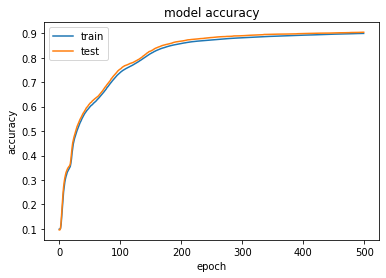

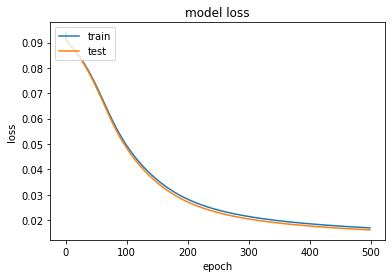

In [101]:
# list all data in history
print(history.history.keys())

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

QUESTION 3: Does the model show any indication of overfitting? Why (not)?

QUESTION 4: How do the accuracy and loss compare to the previous model?What can you infer from this comparison? 

When we look at the graphs generated above the model converges because the loss lines form a horzontal line after the epoch is greater than 300. 
There is no overfitting in the model because if you look at nth validation set it is not different from the behavior of the model with the training dataa  set. I can clearly infer the model does handle generalization very well and above graphs validates that.

### Evaluate the model

In [102]:
model.evaluate(X_validation, y_validation)

313/313 [==============================] - 0s 396us/step - loss: 0.0161 - accuracy: 0.9040


[0.016085464507341385, 0.9039999842643738]

### TODO 3

Write code to display the confusion matrix for your classifier and comment on the insights such confusion matrix provides.

See [this](https://scikit-learn.org/stable/auto_examples/classification/plot_digits_classification.html) for an example.

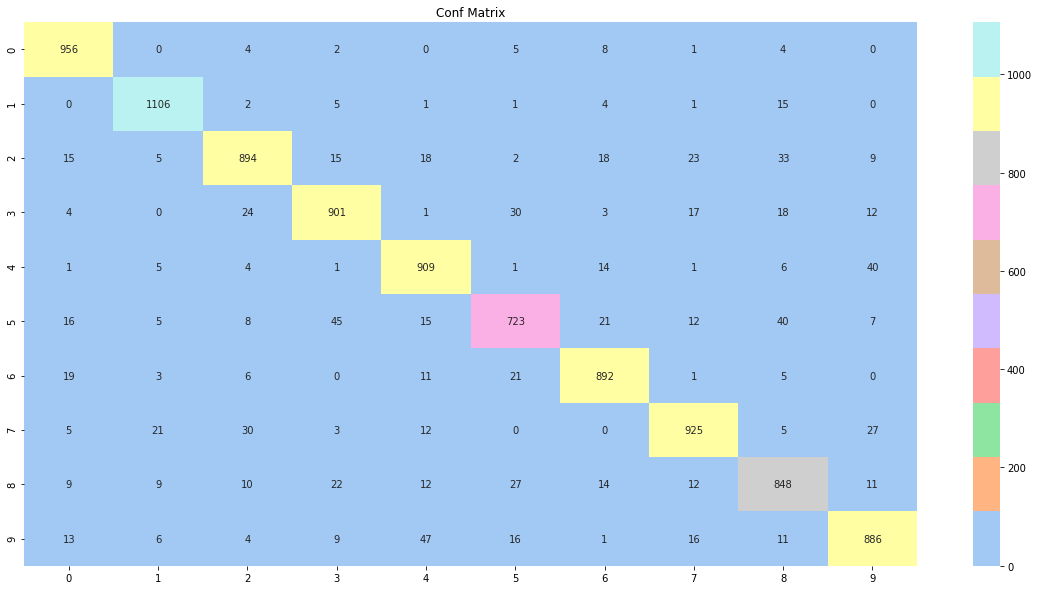

In [103]:
import warnings
warnings.filterwarnings("ignore")
def conMatrix():
    plt.figure(figsize=(20,10))
    sns.heatmap(confusion_matrix(y_valid, model.predict_classes(X_validation)) , 
                cmap=sns.color_palette("pastel", as_cmap=True),
               annot=True, fmt="d")
    plt.title("Conf Matrix")
    plt.show()
conMatrix()

In [104]:
mod =  model.predict_classes(X_validation)
report = classification_report(y_valid, mod)
print(report)

              precision    recall  f1-score   support

           0       0.92      0.98      0.95       980
           1       0.95      0.97      0.96      1135
           2       0.91      0.87      0.89      1032
           3       0.90      0.89      0.90      1010
           4       0.89      0.93      0.91       982
           5       0.88      0.81      0.84       892
           6       0.91      0.93      0.92       958
           7       0.92      0.90      0.91      1028
           8       0.86      0.87      0.87       974
           9       0.89      0.88      0.89      1009

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



### Question 3

The confusion matrix can give us performance metrics of the model some metrics are like accuracy score and over all error.
If we look at index 0 on first column you can see the model is doing well. You can see forom 980 samples that have 0 label 956 were done callsification right. If you look at index 5 you can see support for 892 and 738 classified correctly which is weaker. Index 5 has more issues on correct classfication


### (OPTIONAL) TODO 4

Write code to display 10 cases where the classifier makes mistakes. Make sure to display both the true value as well as the predicted value.

See [this](https://conx.readthedocs.io/en/latest/MNIST.html) for an example.

In [105]:

y_pred = model.predict_classes(X_validation)
print(y_pred)

[7 2 1 ... 4 8 6]


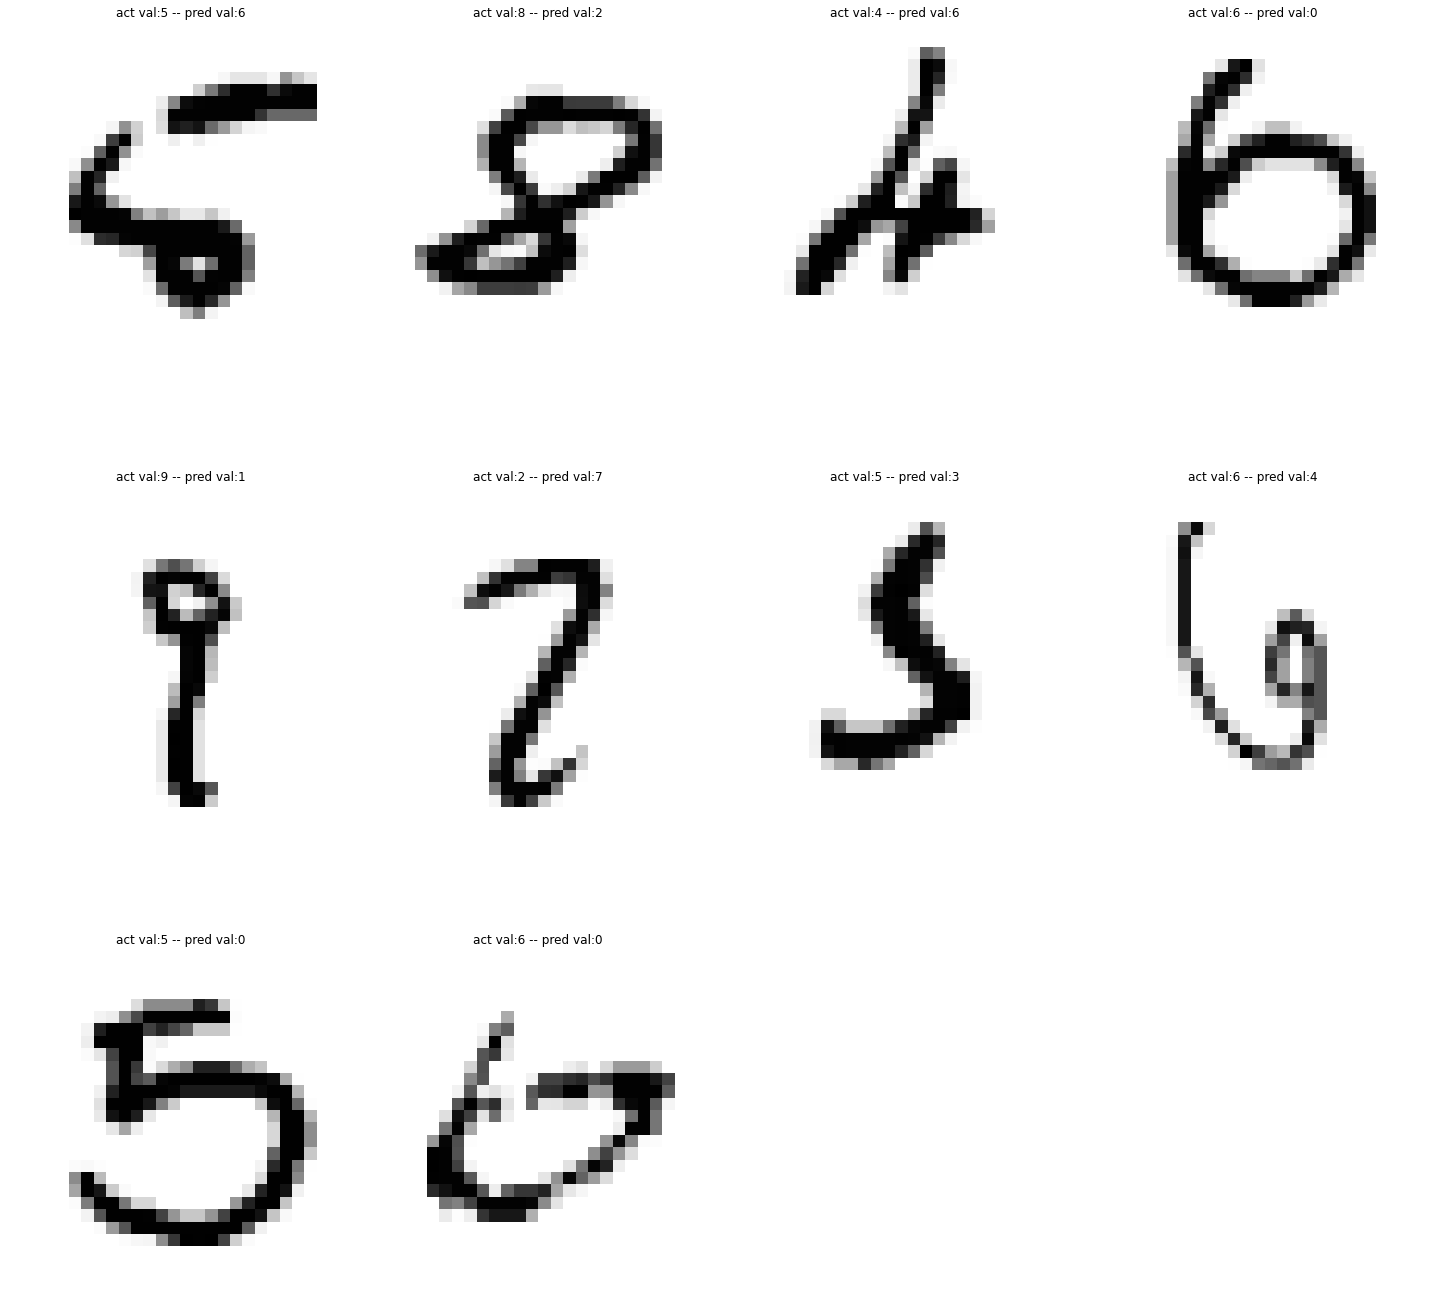

In [106]:
def plotHandler():
    plt.figure(figsize=(20,20))
    for k in range(10):
        plt.subplot(3, 4, k+1)
        plt.imshow(X_valid[y_valid!=y_pred][k], cmap='Greys')
        plt.title("act val:%d -- pred val:%d"%(y_valid[y_valid!=y_pred][k], y_pred[y_valid!=y_pred][k]))
        plt.axis('off')
    plt.tight_layout()
    plt.show()
plotHandler()

### Different optimizer Adam (OPTIONAL Questions)

In [107]:
batch_size=128
epochs=1000

model.compile(
    loss='mean_squared_error', 
    optimizer="adam", 
    metrics=['accuracy']
)

history = model.fit(
  X_training, # training data
  y_training, # training targets
  epochs=epochs,# number of passes of the entire training datase
  batch_size=batch_size, # number of samples processed before the model is updated
  verbose=1,
  validation_data=(X_validation, y_validation)
)

Epoch 1/1000
469/469 [==============================] - 1s 2ms/step - loss: 0.0151 - accuracy: 0.9079 - val_loss: 0.0113 - val_accuracy: 0.9303
Epoch 2/1000
469/469 [==============================] - 0s 767us/step - loss: 0.0109 - accuracy: 0.9333 - val_loss: 0.0097 - val_accuracy: 0.9386
Epoch 3/1000
469/469 [==============================] - 0s 780us/step - loss: 0.0094 - accuracy: 0.9414 - val_loss: 0.0085 - val_accuracy: 0.9478
Epoch 4/1000
469/469 [==============================] - 0s 774us/step - loss: 0.0084 - accuracy: 0.9483 - val_loss: 0.0079 - val_accuracy: 0.9512
Epoch 5/1000
469/469 [==============================] - 0s 771us/step - loss: 0.0074 - accuracy: 0.9553 - val_loss: 0.0072 - val_accuracy: 0.9550
Epoch 6/1000
469/469 [==============================] - 0s 771us/step - loss: 0.0067 - accuracy: 0.9594 - val_loss: 0.0067 - val_accuracy: 0.9564
Epoch 7/1000
469/469 [==============================] - 0s 771us/step - loss: 0.0062 - accuracy: 0.9627 - val_loss: 0.0064 - v

469/469 [==============================] - 0s 778us/step - loss: 6.1068e-04 - accuracy: 0.9971 - val_loss: 0.0040 - val_accuracy: 0.9738
Epoch 57/1000
469/469 [==============================] - 0s 780us/step - loss: 5.9033e-04 - accuracy: 0.9971 - val_loss: 0.0039 - val_accuracy: 0.9750
Epoch 58/1000
469/469 [==============================] - 0s 784us/step - loss: 5.1268e-04 - accuracy: 0.9975 - val_loss: 0.0040 - val_accuracy: 0.9735
Epoch 59/1000
469/469 [==============================] - 0s 774us/step - loss: 4.6468e-04 - accuracy: 0.9977 - val_loss: 0.0039 - val_accuracy: 0.9753
Epoch 60/1000
469/469 [==============================] - 0s 782us/step - loss: 5.0132e-04 - accuracy: 0.9975 - val_loss: 0.0039 - val_accuracy: 0.9742
Epoch 61/1000
469/469 [==============================] - 0s 780us/step - loss: 5.0743e-04 - accuracy: 0.9974 - val_loss: 0.0039 - val_accuracy: 0.9749
Epoch 62/1000
469/469 [==============================] - 0s 771us/step - loss: 4.7425e-04 - accuracy: 0.9976

469/469 [==============================] - 0s 778us/step - loss: 2.1568e-04 - accuracy: 0.9988 - val_loss: 0.0043 - val_accuracy: 0.9724
Epoch 111/1000
469/469 [==============================] - 0s 765us/step - loss: 1.9954e-04 - accuracy: 0.9989 - val_loss: 0.0042 - val_accuracy: 0.9728
Epoch 112/1000
469/469 [==============================] - 0s 782us/step - loss: 2.2433e-04 - accuracy: 0.9987 - val_loss: 0.0042 - val_accuracy: 0.9730
Epoch 113/1000
469/469 [==============================] - 0s 791us/step - loss: 1.8309e-04 - accuracy: 0.9989 - val_loss: 0.0042 - val_accuracy: 0.9730
Epoch 114/1000
469/469 [==============================] - 0s 776us/step - loss: 2.1007e-04 - accuracy: 0.9988 - val_loss: 0.0042 - val_accuracy: 0.9732
Epoch 115/1000
469/469 [==============================] - 0s 774us/step - loss: 2.2015e-04 - accuracy: 0.9987 - val_loss: 0.0046 - val_accuracy: 0.9712
Epoch 116/1000
469/469 [==============================] - 0s 771us/step - loss: 2.2809e-04 - accuracy: 

Epoch 164/1000
469/469 [==============================] - 0s 780us/step - loss: 1.7238e-04 - accuracy: 0.9990 - val_loss: 0.0042 - val_accuracy: 0.9738
Epoch 165/1000
469/469 [==============================] - 0s 776us/step - loss: 1.6505e-04 - accuracy: 0.9990 - val_loss: 0.0043 - val_accuracy: 0.9730
Epoch 166/1000
469/469 [==============================] - 0s 778us/step - loss: 2.1163e-04 - accuracy: 0.9988 - val_loss: 0.0043 - val_accuracy: 0.9736
Epoch 167/1000
469/469 [==============================] - 0s 784us/step - loss: 2.4639e-04 - accuracy: 0.9987 - val_loss: 0.0043 - val_accuracy: 0.9737
Epoch 168/1000
469/469 [==============================] - 0s 778us/step - loss: 1.8030e-04 - accuracy: 0.9989 - val_loss: 0.0043 - val_accuracy: 0.9731
Epoch 169/1000
469/469 [==============================] - 0s 780us/step - loss: 1.6734e-04 - accuracy: 0.9990 - val_loss: 0.0043 - val_accuracy: 0.9728
Epoch 170/1000
469/469 [==============================] - 0s 788us/step - loss: 1.8235e-

Epoch 218/1000
469/469 [==============================] - 0s 776us/step - loss: 2.1418e-04 - accuracy: 0.9987 - val_loss: 0.0043 - val_accuracy: 0.9726
Epoch 219/1000
469/469 [==============================] - 0s 786us/step - loss: 2.1627e-04 - accuracy: 0.9987 - val_loss: 0.0043 - val_accuracy: 0.9727
Epoch 220/1000
469/469 [==============================] - 0s 774us/step - loss: 1.6053e-04 - accuracy: 0.9990 - val_loss: 0.0043 - val_accuracy: 0.9731
Epoch 221/1000
469/469 [==============================] - 0s 780us/step - loss: 2.1136e-04 - accuracy: 0.9988 - val_loss: 0.0044 - val_accuracy: 0.9720
Epoch 222/1000
469/469 [==============================] - 0s 784us/step - loss: 1.8200e-04 - accuracy: 0.9989 - val_loss: 0.0043 - val_accuracy: 0.9727
Epoch 223/1000
469/469 [==============================] - 0s 776us/step - loss: 1.8882e-04 - accuracy: 0.9988 - val_loss: 0.0043 - val_accuracy: 0.9725
Epoch 224/1000
469/469 [==============================] - 0s 778us/step - loss: 2.0432e-

Epoch 272/1000
469/469 [==============================] - 0s 788us/step - loss: 2.1155e-04 - accuracy: 0.9987 - val_loss: 0.0043 - val_accuracy: 0.9736
Epoch 273/1000
469/469 [==============================] - 0s 780us/step - loss: 1.4721e-04 - accuracy: 0.9991 - val_loss: 0.0042 - val_accuracy: 0.9739
Epoch 274/1000
469/469 [==============================] - 0s 788us/step - loss: 1.6637e-04 - accuracy: 0.9990 - val_loss: 0.0042 - val_accuracy: 0.9734
Epoch 275/1000
469/469 [==============================] - 0s 778us/step - loss: 1.2638e-04 - accuracy: 0.9992 - val_loss: 0.0042 - val_accuracy: 0.9735
Epoch 276/1000
469/469 [==============================] - 0s 784us/step - loss: 2.2403e-04 - accuracy: 0.9986 - val_loss: 0.0042 - val_accuracy: 0.9739
Epoch 277/1000
469/469 [==============================] - 0s 788us/step - loss: 1.6802e-04 - accuracy: 0.9989 - val_loss: 0.0044 - val_accuracy: 0.9720
Epoch 278/1000
469/469 [==============================] - 0s 772us/step - loss: 2.2150e-

Epoch 326/1000
469/469 [==============================] - 0s 782us/step - loss: 1.6573e-04 - accuracy: 0.9990 - val_loss: 0.0044 - val_accuracy: 0.9734
Epoch 327/1000
469/469 [==============================] - 0s 780us/step - loss: 1.8836e-04 - accuracy: 0.9988 - val_loss: 0.0042 - val_accuracy: 0.9743
Epoch 328/1000
469/469 [==============================] - 0s 776us/step - loss: 1.5261e-04 - accuracy: 0.9991 - val_loss: 0.0044 - val_accuracy: 0.9728
Epoch 329/1000
469/469 [==============================] - 0s 780us/step - loss: 1.9195e-04 - accuracy: 0.9988 - val_loss: 0.0043 - val_accuracy: 0.9742
Epoch 330/1000
469/469 [==============================] - 0s 784us/step - loss: 1.5185e-04 - accuracy: 0.9990 - val_loss: 0.0042 - val_accuracy: 0.9747
Epoch 331/1000
469/469 [==============================] - 0s 776us/step - loss: 1.7288e-04 - accuracy: 0.9989 - val_loss: 0.0042 - val_accuracy: 0.9735
Epoch 332/1000
469/469 [==============================] - 0s 776us/step - loss: 1.8287e-

Epoch 380/1000
469/469 [==============================] - 0s 788us/step - loss: 1.7325e-04 - accuracy: 0.9989 - val_loss: 0.0042 - val_accuracy: 0.9733
Epoch 381/1000
469/469 [==============================] - 0s 786us/step - loss: 1.8059e-04 - accuracy: 0.9988 - val_loss: 0.0042 - val_accuracy: 0.9734
Epoch 382/1000
469/469 [==============================] - 0s 778us/step - loss: 1.6946e-04 - accuracy: 0.9989 - val_loss: 0.0042 - val_accuracy: 0.9734
Epoch 383/1000
469/469 [==============================] - 0s 776us/step - loss: 1.1562e-04 - accuracy: 0.9993 - val_loss: 0.0042 - val_accuracy: 0.9736
Epoch 384/1000
469/469 [==============================] - 0s 780us/step - loss: 1.4909e-04 - accuracy: 0.9990 - val_loss: 0.0042 - val_accuracy: 0.9736
Epoch 385/1000
469/469 [==============================] - 0s 776us/step - loss: 1.3964e-04 - accuracy: 0.9991 - val_loss: 0.0043 - val_accuracy: 0.9735
Epoch 386/1000
469/469 [==============================] - 0s 780us/step - loss: 1.6682e-

Epoch 434/1000
469/469 [==============================] - 0s 791us/step - loss: 1.6316e-04 - accuracy: 0.9990 - val_loss: 0.0043 - val_accuracy: 0.9735
Epoch 435/1000
469/469 [==============================] - 0s 793us/step - loss: 1.4612e-04 - accuracy: 0.9991 - val_loss: 0.0044 - val_accuracy: 0.9734
Epoch 436/1000
469/469 [==============================] - 0s 784us/step - loss: 1.2351e-04 - accuracy: 0.9992 - val_loss: 0.0044 - val_accuracy: 0.9733
Epoch 437/1000
469/469 [==============================] - 0s 782us/step - loss: 1.3843e-04 - accuracy: 0.9991 - val_loss: 0.0044 - val_accuracy: 0.9729
Epoch 438/1000
469/469 [==============================] - 0s 780us/step - loss: 1.8611e-04 - accuracy: 0.9988 - val_loss: 0.0044 - val_accuracy: 0.9730
Epoch 439/1000
469/469 [==============================] - 0s 788us/step - loss: 1.4858e-04 - accuracy: 0.9990 - val_loss: 0.0044 - val_accuracy: 0.9731
Epoch 440/1000
469/469 [==============================] - 0s 786us/step - loss: 1.4360e-

Epoch 488/1000
469/469 [==============================] - 0s 828us/step - loss: 1.5562e-04 - accuracy: 0.9990 - val_loss: 0.0043 - val_accuracy: 0.9738
Epoch 489/1000
469/469 [==============================] - 0s 814us/step - loss: 1.7955e-04 - accuracy: 0.9988 - val_loss: 0.0043 - val_accuracy: 0.9732
Epoch 490/1000
469/469 [==============================] - 0s 820us/step - loss: 1.5604e-04 - accuracy: 0.9990 - val_loss: 0.0043 - val_accuracy: 0.9733
Epoch 491/1000
469/469 [==============================] - 0s 825us/step - loss: 1.5037e-04 - accuracy: 0.9990 - val_loss: 0.0043 - val_accuracy: 0.9735
Epoch 492/1000
469/469 [==============================] - 0s 844us/step - loss: 1.4512e-04 - accuracy: 0.9990 - val_loss: 0.0043 - val_accuracy: 0.9739
Epoch 493/1000
469/469 [==============================] - 0s 852us/step - loss: 1.6210e-04 - accuracy: 0.9990 - val_loss: 0.0043 - val_accuracy: 0.9736
Epoch 494/1000
469/469 [==============================] - 0s 793us/step - loss: 1.7861e-

Epoch 542/1000
469/469 [==============================] - 0s 786us/step - loss: 1.4597e-04 - accuracy: 0.9990 - val_loss: 0.0044 - val_accuracy: 0.9729
Epoch 543/1000
469/469 [==============================] - 0s 797us/step - loss: 1.3466e-04 - accuracy: 0.9991 - val_loss: 0.0044 - val_accuracy: 0.9735
Epoch 544/1000
469/469 [==============================] - 0s 797us/step - loss: 1.1390e-04 - accuracy: 0.9993 - val_loss: 0.0043 - val_accuracy: 0.9742
Epoch 545/1000
469/469 [==============================] - 0s 780us/step - loss: 1.5613e-04 - accuracy: 0.9989 - val_loss: 0.0044 - val_accuracy: 0.9732
Epoch 546/1000
469/469 [==============================] - 0s 776us/step - loss: 1.1725e-04 - accuracy: 0.9992 - val_loss: 0.0044 - val_accuracy: 0.9739
Epoch 547/1000
469/469 [==============================] - 0s 784us/step - loss: 1.3147e-04 - accuracy: 0.9991 - val_loss: 0.0044 - val_accuracy: 0.9736
Epoch 548/1000
469/469 [==============================] - 0s 793us/step - loss: 1.4279e-

Epoch 596/1000
469/469 [==============================] - 0s 786us/step - loss: 1.4378e-04 - accuracy: 0.9991 - val_loss: 0.0046 - val_accuracy: 0.9724
Epoch 597/1000
469/469 [==============================] - 0s 790us/step - loss: 1.3977e-04 - accuracy: 0.9991 - val_loss: 0.0046 - val_accuracy: 0.9729
Epoch 598/1000
469/469 [==============================] - 0s 782us/step - loss: 1.2304e-04 - accuracy: 0.9992 - val_loss: 0.0046 - val_accuracy: 0.9730
Epoch 599/1000
469/469 [==============================] - 0s 784us/step - loss: 1.8102e-04 - accuracy: 0.9988 - val_loss: 0.0046 - val_accuracy: 0.9730
Epoch 600/1000
469/469 [==============================] - 0s 789us/step - loss: 1.2990e-04 - accuracy: 0.9991 - val_loss: 0.0046 - val_accuracy: 0.9732
Epoch 601/1000
469/469 [==============================] - 0s 780us/step - loss: 1.2021e-04 - accuracy: 0.9992 - val_loss: 0.0046 - val_accuracy: 0.9731
Epoch 602/1000
469/469 [==============================] - 0s 801us/step - loss: 1.2771e-

Epoch 650/1000
469/469 [==============================] - 0s 791us/step - loss: 1.3045e-04 - accuracy: 0.9991 - val_loss: 0.0045 - val_accuracy: 0.9721
Epoch 651/1000
469/469 [==============================] - 0s 835us/step - loss: 1.4238e-04 - accuracy: 0.9991 - val_loss: 0.0046 - val_accuracy: 0.9711
Epoch 652/1000
469/469 [==============================] - 0s 844us/step - loss: 1.1165e-04 - accuracy: 0.9993 - val_loss: 0.0046 - val_accuracy: 0.9717
Epoch 653/1000
469/469 [==============================] - 0s 799us/step - loss: 1.2470e-04 - accuracy: 0.9992 - val_loss: 0.0046 - val_accuracy: 0.9721
Epoch 654/1000
469/469 [==============================] - 0s 774us/step - loss: 1.5925e-04 - accuracy: 0.9990 - val_loss: 0.0047 - val_accuracy: 0.9721
Epoch 655/1000
469/469 [==============================] - 0s 782us/step - loss: 1.5364e-04 - accuracy: 0.9989 - val_loss: 0.0047 - val_accuracy: 0.9719
Epoch 656/1000
469/469 [==============================] - 0s 784us/step - loss: 1.2556e-

Epoch 704/1000
469/469 [==============================] - 0s 784us/step - loss: 1.5707e-04 - accuracy: 0.9990 - val_loss: 0.0045 - val_accuracy: 0.9728
Epoch 705/1000
469/469 [==============================] - 0s 780us/step - loss: 1.0913e-04 - accuracy: 0.9993 - val_loss: 0.0045 - val_accuracy: 0.9731
Epoch 706/1000
469/469 [==============================] - 0s 791us/step - loss: 1.8125e-04 - accuracy: 0.9988 - val_loss: 0.0046 - val_accuracy: 0.9719
Epoch 707/1000
469/469 [==============================] - 0s 782us/step - loss: 1.6388e-04 - accuracy: 0.9990 - val_loss: 0.0045 - val_accuracy: 0.9737
Epoch 708/1000
469/469 [==============================] - 0s 778us/step - loss: 1.2978e-04 - accuracy: 0.9991 - val_loss: 0.0046 - val_accuracy: 0.9723
Epoch 709/1000
469/469 [==============================] - 0s 782us/step - loss: 1.3178e-04 - accuracy: 0.9991 - val_loss: 0.0046 - val_accuracy: 0.9725
Epoch 710/1000
469/469 [==============================] - 0s 780us/step - loss: 1.3445e-

Epoch 758/1000
469/469 [==============================] - 0s 782us/step - loss: 1.2370e-04 - accuracy: 0.9992 - val_loss: 0.0046 - val_accuracy: 0.9713
Epoch 759/1000
469/469 [==============================] - 0s 782us/step - loss: 1.6480e-04 - accuracy: 0.9989 - val_loss: 0.0046 - val_accuracy: 0.9723
Epoch 760/1000
469/469 [==============================] - 0s 782us/step - loss: 1.5940e-04 - accuracy: 0.9989 - val_loss: 0.0046 - val_accuracy: 0.9720
Epoch 761/1000
469/469 [==============================] - 0s 784us/step - loss: 1.3262e-04 - accuracy: 0.9991 - val_loss: 0.0046 - val_accuracy: 0.9717
Epoch 762/1000
469/469 [==============================] - 0s 781us/step - loss: 1.4369e-04 - accuracy: 0.9990 - val_loss: 0.0046 - val_accuracy: 0.9723
Epoch 763/1000
469/469 [==============================] - 0s 780us/step - loss: 1.3096e-04 - accuracy: 0.9991 - val_loss: 0.0045 - val_accuracy: 0.9718
Epoch 764/1000
469/469 [==============================] - 0s 780us/step - loss: 1.3357e-

Epoch 812/1000
469/469 [==============================] - 0s 778us/step - loss: 1.2075e-04 - accuracy: 0.9992 - val_loss: 0.0045 - val_accuracy: 0.9722
Epoch 813/1000
469/469 [==============================] - 0s 784us/step - loss: 1.1153e-04 - accuracy: 0.9992 - val_loss: 0.0046 - val_accuracy: 0.9727
Epoch 814/1000
469/469 [==============================] - 0s 778us/step - loss: 1.5173e-04 - accuracy: 0.9990 - val_loss: 0.0045 - val_accuracy: 0.9723
Epoch 815/1000
469/469 [==============================] - 0s 788us/step - loss: 1.4479e-04 - accuracy: 0.9990 - val_loss: 0.0045 - val_accuracy: 0.9726
Epoch 816/1000
469/469 [==============================] - 0s 780us/step - loss: 1.5328e-04 - accuracy: 0.9990 - val_loss: 0.0045 - val_accuracy: 0.9729
Epoch 817/1000
469/469 [==============================] - 0s 806us/step - loss: 1.0106e-04 - accuracy: 0.9993 - val_loss: 0.0045 - val_accuracy: 0.9725
Epoch 818/1000
469/469 [==============================] - 0s 801us/step - loss: 1.0256e-

Epoch 866/1000
469/469 [==============================] - 0s 827us/step - loss: 1.0607e-04 - accuracy: 0.9993 - val_loss: 0.0046 - val_accuracy: 0.9725
Epoch 867/1000
469/469 [==============================] - 0s 814us/step - loss: 1.3473e-04 - accuracy: 0.9991 - val_loss: 0.0046 - val_accuracy: 0.9716
Epoch 868/1000
469/469 [==============================] - 0s 808us/step - loss: 1.1773e-04 - accuracy: 0.9992 - val_loss: 0.0046 - val_accuracy: 0.9728
Epoch 869/1000
469/469 [==============================] - 0s 791us/step - loss: 1.3460e-04 - accuracy: 0.9991 - val_loss: 0.0046 - val_accuracy: 0.9721
Epoch 870/1000
469/469 [==============================] - 0s 784us/step - loss: 1.2880e-04 - accuracy: 0.9992 - val_loss: 0.0046 - val_accuracy: 0.9724
Epoch 871/1000
469/469 [==============================] - 0s 869us/step - loss: 8.7730e-05 - accuracy: 0.9994 - val_loss: 0.0046 - val_accuracy: 0.9716
Epoch 872/1000
469/469 [==============================] - 0s 827us/step - loss: 7.9294e-

Epoch 920/1000
469/469 [==============================] - 0s 782us/step - loss: 1.2059e-04 - accuracy: 0.9992 - val_loss: 0.0046 - val_accuracy: 0.9719
Epoch 921/1000
469/469 [==============================] - 0s 808us/step - loss: 1.4130e-04 - accuracy: 0.9990 - val_loss: 0.0047 - val_accuracy: 0.9717
Epoch 922/1000
469/469 [==============================] - 0s 852us/step - loss: 1.4329e-04 - accuracy: 0.9990 - val_loss: 0.0046 - val_accuracy: 0.9725
Epoch 923/1000
469/469 [==============================] - 0s 852us/step - loss: 1.0059e-04 - accuracy: 0.9993 - val_loss: 0.0046 - val_accuracy: 0.9722
Epoch 924/1000
469/469 [==============================] - 0s 829us/step - loss: 1.3091e-04 - accuracy: 0.9991 - val_loss: 0.0047 - val_accuracy: 0.9716
Epoch 925/1000
469/469 [==============================] - 0s 869us/step - loss: 1.1226e-04 - accuracy: 0.9992 - val_loss: 0.0046 - val_accuracy: 0.9725
Epoch 926/1000
469/469 [==============================] - 0s 827us/step - loss: 1.5008e-

Epoch 974/1000
469/469 [==============================] - 0s 797us/step - loss: 1.4825e-04 - accuracy: 0.9990 - val_loss: 0.0050 - val_accuracy: 0.9701
Epoch 975/1000
469/469 [==============================] - 0s 795us/step - loss: 1.4284e-04 - accuracy: 0.9990 - val_loss: 0.0047 - val_accuracy: 0.9716
Epoch 976/1000
469/469 [==============================] - 0s 818us/step - loss: 1.2758e-04 - accuracy: 0.9991 - val_loss: 0.0047 - val_accuracy: 0.9721
Epoch 977/1000
469/469 [==============================] - 0s 810us/step - loss: 1.1078e-04 - accuracy: 0.9992 - val_loss: 0.0047 - val_accuracy: 0.9720
Epoch 978/1000
469/469 [==============================] - 0s 808us/step - loss: 9.4212e-05 - accuracy: 0.9994 - val_loss: 0.0047 - val_accuracy: 0.9723
Epoch 979/1000
469/469 [==============================] - 0s 816us/step - loss: 1.0002e-04 - accuracy: 0.9993 - val_loss: 0.0047 - val_accuracy: 0.9723
Epoch 980/1000
469/469 [==============================] - 0s 827us/step - loss: 1.1747e-

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


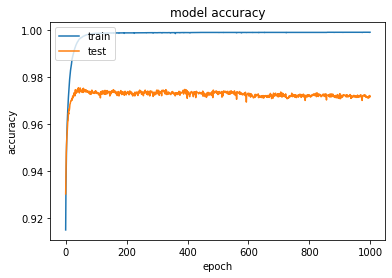

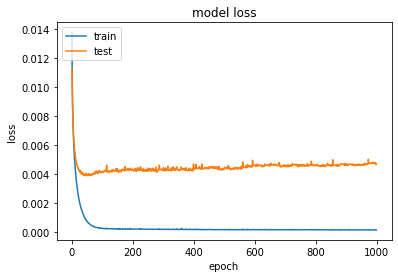

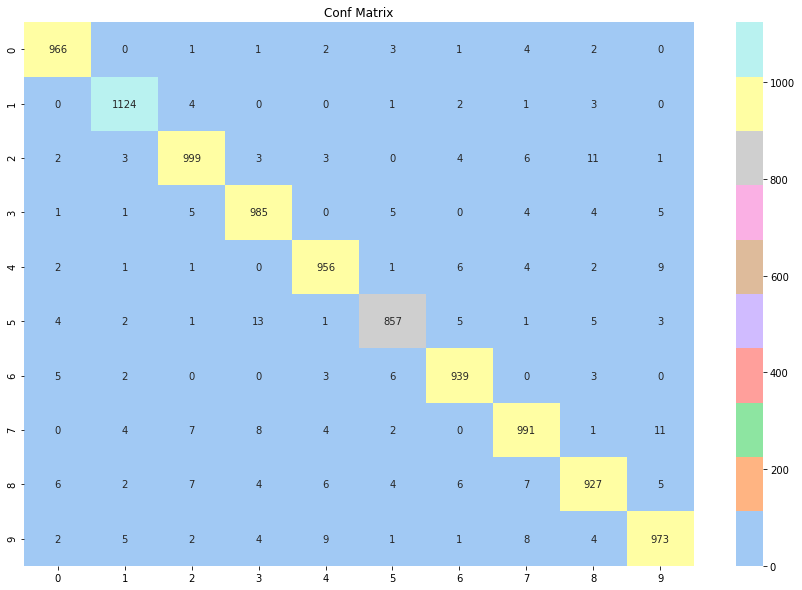

In [110]:
def plot():
    # show all all data in history
    print(history.history.keys())

     # display summary of history for accuracy
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

    # breakdown summary history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

def confMatrix():
    plt.figure(figsize=(15,10))
    sns.heatmap(confusion_matrix(y_valid, model.predict_classes(X_validation)) , 
                cmap=sns.color_palette("pastel", as_cmap=True),
               annot=True, fmt="d")
    plt.title("Conf Matrix")
    plt.show()
plot()
confMatrix()

In [111]:
print(classification_report(y_valid, model.predict_classes(X_validation)))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       980
           1       0.98      0.99      0.99      1135
           2       0.97      0.97      0.97      1032
           3       0.97      0.98      0.97      1010
           4       0.97      0.97      0.97       982
           5       0.97      0.96      0.97       892
           6       0.97      0.98      0.98       958
           7       0.97      0.96      0.96      1028
           8       0.96      0.95      0.96       974
           9       0.97      0.96      0.97      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



In [112]:
model.evaluate(X_validation, y_validation)

313/313 [==============================] - 0s 406us/step - loss: 0.0047 - accuracy: 0.9717


[0.004666103515774012, 0.9717000126838684]

Optimizers are functions/algorithms used to manipulate the features of your neural network like learningr rates and weights to bring down the losses. Some goals for optimizers to assist with quicker results.Above you can see optimizer does help perform better.You can see that the loss lines for fit and test deteriorate heavy towward 480-500. As we increase iterations we will eventually get better scores. 

## PART 2 - Convolutional neural network (CNN) architecture

In [113]:
model_cnn = keras.Sequential(
    [
        keras.layers.InputLayer(input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model_cnn.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
module_wrapper (ModuleWrappe (None, 26, 26, 32)        320       
_________________________________________________________________
module_wrapper_1 (ModuleWrap (None, 13, 13, 32)        0         
_________________________________________________________________
module_wrapper_2 (ModuleWrap (None, 11, 11, 64)        18496     
_________________________________________________________________
module_wrapper_3 (ModuleWrap (None, 5, 5, 64)          0         
_________________________________________________________________
module_wrapper_4 (ModuleWrap (None, 1600)              0         
_________________________________________________________________
module_wrapper_5 (ModuleWrap (None, 1600)              0         
_________________________________________________________________
module_wrapper_6 (ModuleWrap (None, 10)               

### Configure model

In [114]:
model_cnn.compile(
    loss="categorical_crossentropy", 
    optimizer="adam", 
    metrics=["accuracy"]
)

### Prepare the data
The CNN does not expect the images to be flattened.

In [116]:
# upload
(X_train, y_train), (X_valid, y_valid) = mnist.load_data()

# convert vectors to binary  matrices
y_training = keras.utils.np_utils.to_categorical(y_train, num_classes)
y_validation = keras.utils.np_utils.to_categorical(y_valid, num_classes)

# update images to [0, 1] range 
X_train_cnn = X_train.astype("float32") / 255
X_valid_cnn = X_valid.astype("float32") / 255

# update  dimension of train/test inputs
X_train_cnn = np.expand_dims(X_train_cnn, -1)
X_valid_cnn = np.expand_dims(X_valid_cnn, -1)

# Make sure images have shape (28, 28, 1)
print("x_train shape:", X_train_cnn.shape)
print(X_train_cnn.shape[0], "train samples")
print(X_valid_cnn.shape[0], "test samples")

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


### Train!


In [117]:
batch_size=128
epochs=15

history = model_cnn.fit(
  X_train_cnn, # training data
  y_training, # training targets
  epochs=epochs,
  batch_size=batch_size,
  verbose=1,
  validation_data=(X_valid_cnn, y_validation)
)

Epoch 1/15
469/469 [==============================] - 12s 24ms/step - loss: 0.7016 - accuracy: 0.7941 - val_loss: 0.0831 - val_accuracy: 0.9751
Epoch 2/15
469/469 [==============================] - 11s 24ms/step - loss: 0.1168 - accuracy: 0.9638 - val_loss: 0.0548 - val_accuracy: 0.9837
Epoch 3/15
469/469 [==============================] - 12s 25ms/step - loss: 0.0841 - accuracy: 0.9738 - val_loss: 0.0447 - val_accuracy: 0.9855
Epoch 4/15
469/469 [==============================] - 11s 24ms/step - loss: 0.0695 - accuracy: 0.9787 - val_loss: 0.0416 - val_accuracy: 0.9865
Epoch 5/15
469/469 [==============================] - 11s 24ms/step - loss: 0.0599 - accuracy: 0.9817 - val_loss: 0.0369 - val_accuracy: 0.9874
Epoch 6/15
469/469 [==============================] - 12s 25ms/step - loss: 0.0564 - accuracy: 0.9827 - val_loss: 0.0317 - val_accuracy: 0.9891
Epoch 7/15
469/469 [==============================] - 12s 26ms/step - loss: 0.0475 - accuracy: 0.9856 - val_loss: 0.0308 - val_accuracy:

### Plot learning curves

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


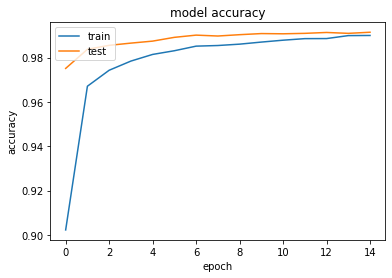

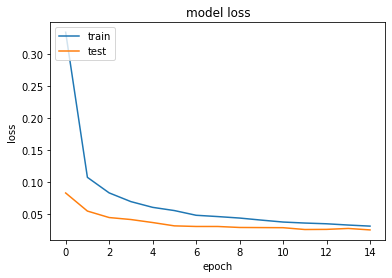

In [118]:
def plot():
    # show all all data in history
    print(history.history.keys())

    # display summary of history for accuracy
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

    # breakdown summary history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
plot()

### Evaluate the model

In [119]:
model_cnn.evaluate(X_valid_cnn, y_validation)

313/313 [==============================] - 1s 2ms/step - loss: 0.0254 - accuracy: 0.9914


[0.02536826767027378, 0.9914000034332275]

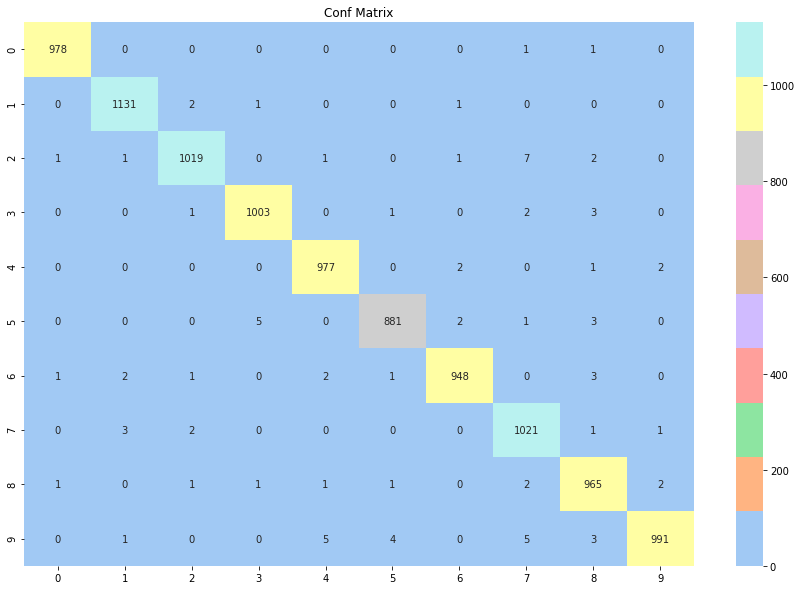

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       980
           1       0.99      1.00      1.00      1135
           2       0.99      0.99      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.98      0.99      0.99      1028
           8       0.98      0.99      0.99       974
           9       0.99      0.98      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [124]:
def confMatrix():
    plt.figure(figsize=(15,10))
    sns.heatmap(confusion_matrix(y_valid, model_cnn.predict_classes(X_valid_cnn)) , 
                cmap=sns.color_palette("pastel", as_cmap=True),
               annot=True, fmt="d")
    plt.title("Conf Matrix")
    plt.show()
confMatrix()


In [130]:
print(model_cnn.predict_classes(X_valid_cnn))
print(y_valid)

print(classification_report(y_valid, model_cnn.predict_classes(X_valid_cnn)))

[7 2 1 ... 4 5 6]
[7 2 1 ... 4 5 6]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       980
           1       0.99      1.00      1.00      1135
           2       0.99      0.99      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.98      0.99      0.99      1028
           8       0.98      0.99      0.99       974
           9       0.99      0.98      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



### QUESTION 4: How do the accuracy and loss compare to the previous model?What can you infer from this comparison? 

You look at the curves and the results from conf matrix above we notice better results from 90% to 99%.Loss value shows how poorly or well a model behaves after each iteration of optimization.The accuracy data is used to determine the models performance in an unobfuscated way. You can aslo validate with above we reduced iterations which means it helped us reduce the time by 50% which was alot helpful it was taxing on my cpu and took more time to run other models.You can validate with example above with deeper models we get more better performance resutls and also quicker results. This has some things as I was getting better results. I also continued to monitor any over fitting that might happening. So overfitting can be a possible issue with this.
